# 📊 EDA: Spam vs Ham Email Classification

### 👨‍💻 Notebook Overview:
In this notebook, I explore the SpamAssassin email dataset using Pandas and basic visualizations. 
The goal is to understand the structure and distribution of the data before we clean and model it.

### 🧪 What’s happening in this cell:
- I import the necessary libraries for data analysis and visualization (`pandas`, `matplotlib`, `seaborn`)
- I load the labeled email data (spam vs ham) from my cleaned data pipeline using a custom function: `load_spam_ham_data()`
- I check the dataset shape and preview a few sample rows to confirm it loaded correctly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../src')

from data import load_spam_ham_data


In [2]:
df = load_spam_ham_data(base_path='../data')

print(f"Shape: {df.shape}")
df['label'].value_counts()
df.head()

Shape: (5801, 2)


,text,label
0,Delivered-To: zzzz-spamtrap@sonic.spamtraps.ta...,spam
1,From zzzz@spamassassin.taint.org Mon Sep 2 1...,spam
2,From yourhealth@hottmail.com Fri Sep 20 11:41...,spam
3,From jennifer3530t76@usa.com Mon Aug 26 15:14...,spam
4,From donaldbae@purplehotel.com Wed Aug 28 11:...,spam


### 🔍 Notes:
- The dataset has **5801 total emails**
- Labels are already assigned as `spam` or `ham`
- Each row contains the raw text of the email (including headers for now)

Next, I’ll inspect the class distribution and text lengths to see if any imbalances or patterns stand out.

## Visualization of the Classes:


### 🧮 Why visualize class distribution?

Before modeling, it's important to see how balanced our dataset is between spam and ham.  
Imbalanced datasets can bias the model toward the majority class.

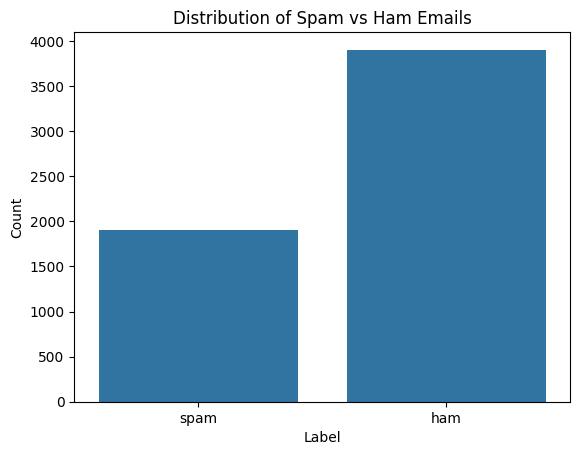

In [3]:
sns.countplot(data=df, x='label')
plt.title("Distribution of Spam vs Ham Emails")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### 📈 What the above plot shows:

- There are about **4000 ham emails** and **2000 spam emails**
- So, **ham is 2x more common than spam**, which could affect model performance

This kind of imbalance is common in real-world spam filters, and I'll keep it in mind when evaluating our model later.

## 🧹 Cleaning: Remove Email Headers

Most emails start with headers like “From”, “Subject”, and “Date” which are not useful for classifying spam vs ham.  
To clean the text, I define a simple function that removes everything before the first empty line (`\n\n`), leaving only the body of the email.

I also convert everything to lowercase to normalize the text.

In [4]:
def strip_email_headers(text):
    """Remove headers and keep the body only."""
    return text.split("\n\n", 1)[-1]

df['clean_text'] = df['text'].apply(strip_email_headers).str.lower()
df['clean_text'].head()

0    ------=_nextpart_000_00x9_70a11c1d.e1232j43\nc...
1    all our mailings are sent complying to the pro...
2    need health insurance? \n in addition to featu...
3    <html><p align=center><font ptsize="14" family...
4    \nðïà¡±á worldwide*\ngreat restaurants, shop...
Name: clean_text, dtype: object



## 📏 Explore Email Lengths

### 🤔 Why look at text length?

Understanding the length of emails helps us learn whether spam and ham messages tend to be short, long, or similar.  
This can hint at useful features for classification (e.g., are spam messages typically shorter or more formulaic?).

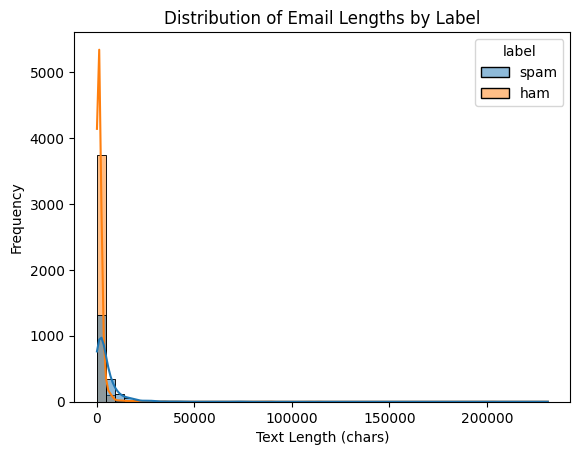

In [5]:
df['text_length'] = df['clean_text'].apply(len)

sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title("Distribution of Email Lengths by Label")
plt.xlabel("Text Length (chars)")
plt.ylabel("Frequency")
plt.show()

### 📈 What this plot shows:

- The histogram compares the distribution of text lengths in characters.
- Most emails, both spam and ham, are clustered under ~5000 characters.
- Ham emails show a wider spread, meaning they tend to be longer and more varied.
- Spam emails are more tightly packed — possibly due to templated or repeated messaging.

## 🔤 Preview Top Words in Spam vs Ham

Before diving into full NLP preprocessing, I preview the most frequent words in each category using Python’s `Counter` below.

This will help us:
- Spot common spam keywords (like “free”, “win”, “click”)
- Compare typical vocabulary across classes
- Get a feel for the raw text before stopwords or cleaning

In [6]:
from collections import Counter

def get_top_words(texts, n=20):
    words = ' '.join(texts).split()
    return Counter(words).most_common(n)

spam_top_words = get_top_words(df[df['label'] == 'spam']['clean_text'])
ham_top_words = get_top_words(df[df['label'] == 'ham']['clean_text'])

print("Top spam words:", spam_top_words[:10])
print("Top ham words:", ham_top_words[:10])

Top spam words: [('the', 19827), ('to', 18351), ('and', 13664), ('of', 12041), ('you', 11287), ('a', 9559), ('=', 8332), ('your', 8046), ('for', 7758), ('<td', 7478)]
Top ham words: [('the', 37453), ('>', 30611), ('to', 21848), ('a', 17676), ('of', 16954), ('and', 16542), ('in', 11203), ('is', 10895), ('that', 9585), ('i', 9371)]


## Wrap-Up

#### 📌 Summary

- Dataset contains 5800+ emails (2000 spam, 3800 ham)
- Spam and ham distributions are imbalanced
- Spam emails often include short, repetitive patterns
- We'll need to clean text further before modeling:
  - Remove punctuation
  - Remove stopwords
  - Tokenize and vectorize

Next up: Text preprocessing with NLP tools like `nltk` or `re`.

The analysis with continue with another notebook titled: 02_text_preprocessing